# Text Mining

With this exercise, you can learn more about text mining. The exercise is an extension of the example you know from the text. Instead of only eight tweets, you should analyze the complete corpus of Donald Trump tweets from 2017 and use word clouds to visualize how your preprocessing modifies the data. 

## Data and Libraries

Your task in this exercise is to analyze textual data. You will perform various processing steps and see how the results of a simple visualization through word clouds evolve. You can find everything you need in the ```nltk``` and ```wordcloud``` libraries (+ some basic stuff, e.g., for regular expressions).

For this exercise set, we provide data about the tweets from Donald Trump in 2017. You can download the data [here](https://user.informatik.uni-goettingen.de/~sherbold/trump-tweets-2017.txt), each line contains a single tweet. 

## Word clouds without pre-processing

Load the data and create a word cloud without any further processing of the text data. Does this already work? What are problems?

We start with loading the data. We must specify the encoding of the text file to ensure that we do not have binary strings. We then create the word cloud. 

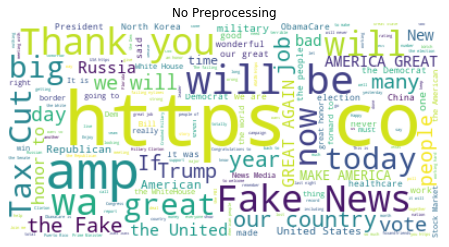

In [31]:
import re
import urllib.request
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# directly load from the url instead of using the file
corpus = []
for line in urllib.request.urlopen("https://user.informatik.uni-goettingen.de/~sherbold/trump-tweets-2017.txt"):
        corpus.append(line.decode('utf-8'))
        
wc_raw = WordCloud(background_color="white")
wc_raw.generate(' '.join(corpus))

plt.figure(figsize=(12,4))
plt.axis('off')
plt.imshow(wc_raw, interpolation="bilinear")
plt.title('No Preprocessing')
plt.show()

While can already see some meaningful words, e.g., fake news and tax cut, the world cloud is dominated by artifacts, e.g., https from links, co from shortened links, and amp from the HTML entity for the ampersand (&). 

## Pre-processing textual data

Clean up the textual data, e.g., using the methods discussed in the lecture. Create a new word cloud based on the cleaned corpus.

We clean the data such that we remove links, drop the ampersand, remove the punctuation, replace US with USA to ensure that this is not dropped because it is mixed up with us, and lowercase everything. Then, we remove stop words, all words that contain non-ascii characters and lemmatize the words. We do not use stemming, because we want real words in the word cloud and not just stems. 

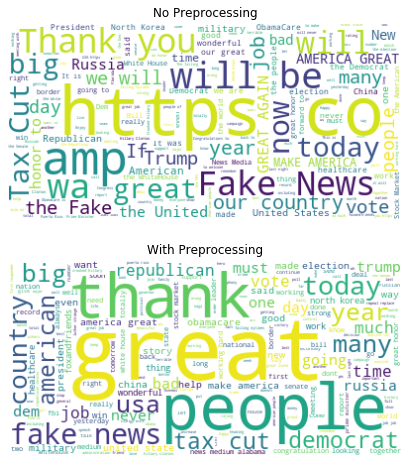

In [32]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

processed_corpus = []
for tweet in corpus:
    # remove links
    modified_tweet = re.sub(r'http\S+', '', tweet).strip()
    # remove &amp; (html entity for &)
    modified_tweet = modified_tweet.replace('&amp;', '')
    # remove punctuation
    modified_tweet = modified_tweet.translate(str.maketrans('', '', string.punctuation))
    # replace US with USA
    modified_tweet = modified_tweet.replace('US', 'usa')
    # lower case
    modified_tweet = modified_tweet.lower()

    # now we tokenize, because the following operations work on the word-level
    words = word_tokenize(modified_tweet)
    modified_tweet = ' '.join([lemmatizer.lemmatize(w)
                               for w in words if w.isalpha() and w not in stop_words])
    processed_corpus.append(modified_tweet)

wc_processed = WordCloud(background_color="white")
wc_processed.generate(' '.join(processed_corpus))

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wc_raw, interpolation="bilinear")
axes[0].set_title('No Preprocessing')
axes[1].axis('off')
axes[1].imshow(wc_processed, interpolation="bilinear")
axes[1].set_title('With Preprocessing')
plt.show()

Due to the cleaning of the data, we now see the most used words, without stop words. Many tweets seem to cover something great, thank somebody, or talk about people. We also see other topical issues from 2017, e.g., the large tax cut that was implemented, the constant war on news, as well as references to Russia, voting, and elections. 

## Use TF-IDF instead of TF

The word clouds are based on simple term frequencies (TF) by default. Calculate the tf-idf, i.e., the term frequency weighted with the inverse document frequency and create a new word cloud based on these frequencies. How does it change?

We first create a new word cloud with the TFIDF. 

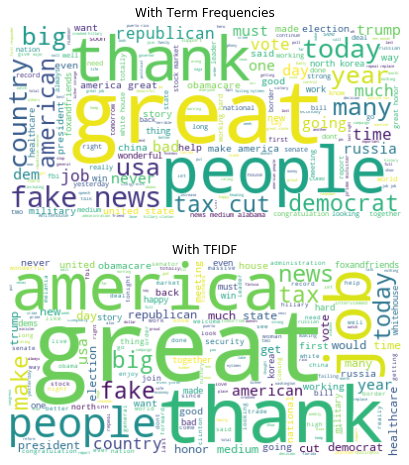

In [33]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_corpus)

frequencies = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names()).sum().to_dict()

wc_tfidf = WordCloud(background_color="white")
wc_tfidf.generate_from_frequencies(frequencies)

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wc_processed, interpolation="bilinear")
axes[0].set_title('With Term Frequencies')
axes[1].axis('off')
axes[1].imshow(wc_tfidf, interpolation="bilinear")
axes[1].set_title('With TFIDF')
plt.show()

When we compare the word clouds, we can see that some terms are clearly scaled up: america, great, and job. Most other terms seem less important, e.g., people, fake, news, and country. 